In [10]:
import numpy as np

In [11]:
data = np.loadtxt("data.csv",delimiter=",")
x=data[:,0]
y=data[:,1]
x.shape

(100,)

In [12]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x,y,test_size=0.3)
X_train.shape

(70,)

In [13]:
def fit(x_train, y_train):
  num = (x_train*y_train).mean() - x_train.mean()*y_train.mean()
  den = (x_train**2).mean() - x_train.mean()**2
  m=num/den
  c=y_train.mean() - m*x_train.mean()
  return m,c

def predict(x,m,c):
  return m*x+c

def score(y_truth, y_pred):
  u=((y_truth-y_pred)**2).sum()
  v=((y_truth-y_pred.mean())**2).sum()
  return 1-u/v

def cost (x, y, m , c):
  return ((y - m * x - c)**2).mean()

In [14]:
m, c= fit(X_train, Y_train)
#train pred
y_test_pred = predict(X_test,m,c)
print("Test Score: ",score(Y_test, y_test_pred))
#train data
y_train_pred = predict(X_train, m, c)
print("Train Score: ", score(Y_train, y_train_pred))
print("M, C ", m , c)
print("Cost on training data ", cost(X_train,Y_train, m, c ))

Test Score:  0.62610439345145
Train Score:  0.579928068901014
M, C  1.306604824293486 9.838759506489438
Cost on training data  126.0753400449804


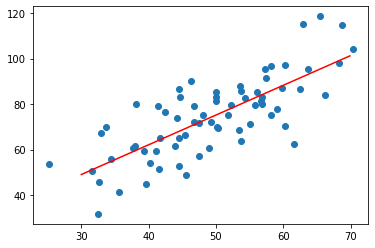

In [16]:
import matplotlib.pyplot as plt

x_line=np.arange(30,70,0.1)
y_line = m*x_line + c
plt.plot(x_line,y_line,"r")
train_1d = X_train.reshape(70)
plt.scatter(X_train,Y_train)
plt.show()

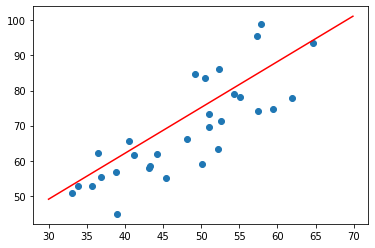

In [18]:
import matplotlib.pyplot as plt
x_line=np.arange(30,70,0.1)
y_line = m*x_line + c
plt.plot(x_line,y_line,"r")
train_1d = X_test.reshape(30)
plt.scatter(X_test,Y_test)
plt.show()